In [1]:
from model import *
from data import *

Using TensorFlow backend.


In [3]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'datasets/data2/train','image','label',data_gen_args,save_to_dir = 'datasets/data2/train/aug',
                        target_size = (256,256),image_color_mode = 'rgb')
model = unetNorm(input_size = (256,256,3))
model_checkpoint = ModelCheckpoint('models/unet_lung1_data2.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=200,epochs=20,callbacks=[model_checkpoint])

Epoch 1/20
Found 552 images belonging to 1 classes.
Found 552 images belonging to 1 classes.
200/200 [==============================] - 1561s 8s/step - loss: 0.6944 - acc: 0.4423

Epoch 00001: loss improved from inf to 0.69439, saving model to unet_lung1_data2.hdf5
Epoch 2/20
200/200 [==============================] - 1542s 8s/step - loss: 0.6457 - acc: 0.9448

Epoch 00002: loss improved from 0.69439 to 0.64571, saving model to unet_lung1_data2.hdf5
Epoch 3/20
200/200 [==============================] - 1532s 8s/step - loss: 0.6114 - acc: 0.9637

Epoch 00003: loss improved from 0.64571 to 0.61140, saving model to unet_lung1_data2.hdf5
Epoch 4/20
200/200 [==============================] - 1531s 8s/step - loss: 0.5804 - acc: 0.9740

Epoch 00004: loss improved from 0.61140 to 0.58038, saving model to unet_lung1_data2.hdf5
Epoch 5/20
200/200 [==============================] - 1523s 8s/step - loss: 0.5491 - acc: 0.9820

Epoch 00005: loss improved from 0.58038 to 0.54910, saving model to unet

In [5]:
testGene = testGenerator("datasets/data2/test/image",target_size = (256,256),as_gray = False,
                        flag_multi_class = True)
model = unetNorm(input_size = (256,256,3))
model.load_weights("models/unet_lung1_data2.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
#we seem to need a renormalization? hopefully when fully trained we will not.
#augResults = np.array([(x-np.min(x))/(np.max(x)-np.min(x)) for x in results])
saveResult("datasets/data2/test/label",results)

30/30 [==============================] - 39s 1s/step


/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data2/test/label/0_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data2/test/label/7_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data2/test/label/8_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data2/test/label/11_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nbuser/.anaconda3/lib/python3.6/site-packages/sk

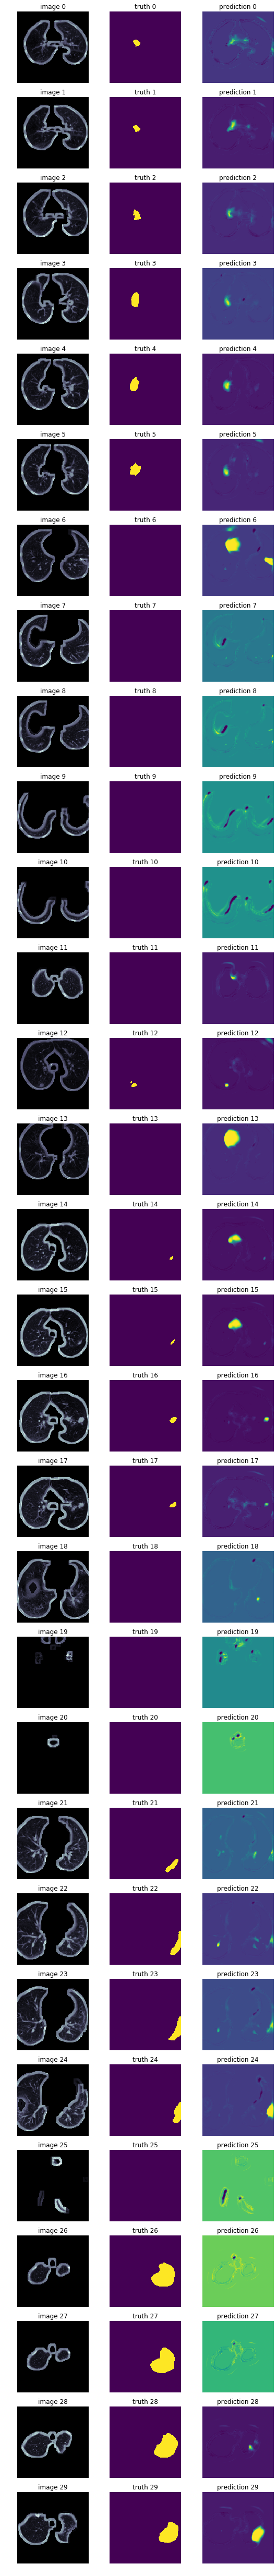

In [6]:
plotResults("datasets/data2/test/image/","datasets/data2/test/label/","datasets/data2/test/label/")